# Baseline

In [11]:
import pandas as pd

df = pd.read_csv("base_empref_train.csv")

df = df.sort_values(['conversation_id', 'speaker_name'])
df['text'] = df.groupby(['conversation_id', 'role'])['text'].transform(lambda x: ' '.join(x))
df = df.drop_duplicates(['conversation_id', 'role'])

# Pivot the table to have 'usr' and 'sys' as columns
df_pivot = df.pivot(index='conversation_id', columns='role', values='text').reset_index()


In [12]:
def __getitem__(self, idx):
    encodings = self.tokenizer(self.usr[idx], self.sys[idx], truncation=True, padding='max_length', max_length=self.max_length)
    item = {key: torch.tensor(val) for key, val in encodings.items()}
    item['labels'] = item['input_ids'].clone()
    return item


In [14]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

class ConversationDataset(torch.utils.data.Dataset):
    def __init__(self, usr, sys, tokenizer, max_length):
        self.usr = usr
        self.sys = sys
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.usr)

    def __getitem__(self, idx):
        encodings = self.tokenizer(self.usr[idx], self.sys[idx], truncation=True, padding='max_length', max_length=self.max_length)
        item = {key: torch.tensor(val) for key, val in encodings.items()}
        item['labels'] = item['input_ids'].clone()  # Add labels
        return item

dataset = ConversationDataset(df_pivot['usr'].tolist(), df_pivot['sys'].tolist(), tokenizer, max_length=512)

valid_df = pd.read_csv("base_empref_valid.csv")

valid_df = valid_df.sort_values(['conversation_id', 'speaker_name'])
valid_df['text'] = valid_df.groupby(['conversation_id', 'role'])['text'].transform(lambda x: ' '.join(x))
valid_df = valid_df.drop_duplicates(['conversation_id', 'role'])

valid_df_pivot = valid_df.pivot(index='conversation_id', columns='role', values='text').reset_index()

valid_dataset = ConversationDataset(valid_df_pivot['usr'].tolist(), valid_df_pivot['sys'].tolist(), tokenizer, max_length=512)

from transformers import GPT2LMHeadModel, TrainingArguments, Trainer

model = GPT2LMHeadModel.from_pretrained('gpt2')

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    eval_dataset=valid_dataset,
)

trainer.train()


loading file vocab.json from cache at /home/tootiya/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/vocab.json
loading file merges.txt from cache at /home/tootiya/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /home/tootiya/.cache/huggingface/hub/models--gpt2/snapshots/e7da7f221d5bf496a48136c0cd264e630fe9fcc8/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner

Step,Training Loss
500,1.486200
1000,0.911500
1500,0.797300
2000,0.687300


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Configuration saved in ./results/checkpoint-2000/generation_config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
/home/tootiya/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware,

TrainOutput(global_step=2223, training_loss=0.9424744750592176, metrics={'train_runtime': 183.1933, 'train_samples_per_second': 24.253, 'train_steps_per_second': 12.135, 'total_flos': 1160920498176000.0, 'train_loss': 0.9424744750592176, 'epoch': 3.0})

In [34]:
from transformers import pipeline

test_df = pd.read_csv("base_empref_test.csv")

test_df = test_df.sort_values(['conversation_id', 'speaker_name'])
test_df['text'] = test_df.groupby(['conversation_id', 'role'])['text'].transform(lambda x: ' '.join(x))
test_df = test_df.drop_duplicates(['conversation_id', 'role'])

test_df_pivot = test_df.pivot(index='conversation_id', columns='role', values='text').reset_index()

conversations = test_df_pivot['usr'].tolist()

In [169]:
# Generate and evaluate responses
generated_responsess = []
for conv in conversations:
    inputs = tokenizer.encode(conv + '\n', return_tensors='pt')  # Add a newline to separate history from generated response

    inputs = inputs.to('cuda')

    outputs = model.generate(inputs, max_length=300, do_sample=True, temperature=0.7)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    context, generated_response = response.rsplit('\n', 1)
    
    generated_responsess.append(generated_response)

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The at

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id":

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id":

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id":

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id":

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id": 50256,
  "max_length": 50,
  "transformers_version": "4.26.0"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "do_sample": true,
  "eos_token_id":

In [389]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

# Prepare references and candidates
references = test_df_pivot['sys'].tolist()
candidates = generated_responses

# Calculate BLEU and ROUGE-L
bleu_1, bleu_2, bleu_3, bleu_4, rouge_l = 0, 0, 0, 0, 0

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

for ref, cand in zip(references, candidates):
    ref, cand = ref.split(), cand.split()
    
    # BLEU
    bleu_1 += sentence_bleu([ref], cand, weights=(1, 0, 0, 0), smoothing_function=SmoothingFunction().method1)
    bleu_2 += sentence_bleu([ref], cand, weights=(0.5, 0.5, 0, 0), smoothing_function=SmoothingFunction().method1)
    bleu_3 += sentence_bleu([ref], cand, weights=(0.33, 0.33, 0.33, 0), smoothing_function=SmoothingFunction().method1)
    bleu_4 += sentence_bleu([ref], cand, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=SmoothingFunction().method1)
    
    # ROUGE-L
    scores = scorer.score(' '.join(ref), ' '.join(cand))
    rouge_l += scores['rougeL'].fmeasure

# Averaging
bleu_1 /= len(references)
bleu_2 /= len(references)
bleu_3 /= len(references)
bleu_4 /= len(references)
rouge_l /= len(references)

print(f"BLEU-1: {bleu_1}\nBLEU-2: {bleu_2}\nBLEU-3: {bleu_3}\nBLEU-4: {bleu_4}\nROUGE-L: {rouge_l}")


BLEU-1: 0.038765498148827134
BLEU-2: 0.01063599720184026
BLEU-3: 0.005637640033344496
BLEU-4: 0.003949704590712822
ROUGE-L: 0.061197672089627175


In [387]:
from nltk.translate.meteor_score import single_meteor_score

# Calculate METEOR and Distinct-1/2
meteor, dist_1, dist_2 = 0, 0, 0

for ref, cand in zip(references, candidates):
    ref, cand = ref.split(), cand.split()

    # METEOR
    meteor += single_meteor_score(ref, cand)
    
    # Distinct-1 and Distinct-2
    unigrams = list(itertools.chain(*[sent.split() for sent in cand]))
    bigrams = list(itertools.chain(*[zip(sent.split()[:-1], sent.split()[1:]) for sent in cand]))
    
    if len(unigrams) != 0:
        dist_1 += len(set(unigrams)) / len(unigrams)
    if len(bigrams) != 0:
        dist_2 += len(set(bigrams)) / len(bigrams)

# Averaging
meteor /= len(references)
dist_1 /= len(references)
dist_2 /= len(references)

print(f"METEOR: {meteor}\nDistinct-1: {dist_1}\nDistinct-2: {dist_2}")


METEOR: 0.0595243645791701
Distinct-1: 0.6157757244156541
Distinct-2: 0.0


In [126]:
import pandas as pd
import json

# Load JSON data
with open('/home/tootiya/EmpRef-Final/codes/DATA/empref/empref.empref/2023-05-10214054.0.0001.16.0gpu/res_epoch-4.pkl_final_empref_test_k.0_p.0.9_b.1_t.0.7_rep.1.5_ngm.0/gen.json') as f:
    data = json.load(f)

# Prepare empty lists for 'post', 'response', and 'generation'
posts = []
responses = []
generations = []

# Iterate over data
for entry in data:
    # Each entry is a list with one dictionary, we get this dictionary
    item = entry[0]
    posts.append(item['post'])
    responses.append(item['response'])
    generations.append(item['generation'])

# Create DataFrame
df = pd.DataFrame({'post': posts, 'response': responses, 'generation': generations})

df

,post,response,generation
0,I miss my ex and the heartbreak just keeps get...,Sounds tough.,You feel so bad about yourself. :) What's the ...
1,After he got home from the hospital he was ang...,I also hope that you husband is still continui...,"It seems like he is trying to say something, b..."
2,I dont see myself having a future. Im awful at...,Your spark carries more weight than you know.,It seems to be a very difficult time for you a...
3,I dont see myself having a future. Im awful at...,Things can change.,I'm not sure why you feel this way. It seems t...
4,I dont see myself having a future. Im awful at...,Maybe they just don't know how to help you.,"I do know that you are not a ""normal"" person. ..."
...,...,...,...
179,The abuser has a master's degree but won't eve...,You cant be too picky till you build up your r...,"If you want to be in a better position, then t..."
180,"After first meeting the client, what is the pr...","Each counselor may have a different process, s...",The counselor may assist the client in a varie...
181,I’ve been hospitalised twice this last few wee...,You can only go up i guess.,"Your question is obviously of no importance. ""..."
182,I’ve been hospitalised twice this last few wee...,"Might have to get back to basics, looking afte...",It's hard to know when you've lost it and not ...


# Human Eval

In [457]:
humaneval = pd.read_csv('EmpRef Human Eval.csv')
humaneval = humaneval.rename(columns={'Empathy-tota;': 'Empathy-total'})
humaneval.head()

,Name,Fluency-1,Fluency-2,Fluency-total,Coherence-1,Coherence-2,Coherence-total,Reflectiveness-1,Reflectiveness-2,Reflectiveness-total,Empathy-1,Empathy-2,Empathy-total,Ranking-1,Ranking-2
0,Target,2,2,4,1,2,3,1,2,3,1,1,2,2,2
1,EmpRef,1,2,3,0,2,2,0,2,2,0,2,2,1,3
2,Base,2,2,4,2,2,4,0,1,1,0,2,2,3,1
3,Target,2,2,4,2,2,4,2,2,4,2,2,4,2,2
4,EmpRef,2,2,4,2,2,4,2,2,4,2,2,4,1,1


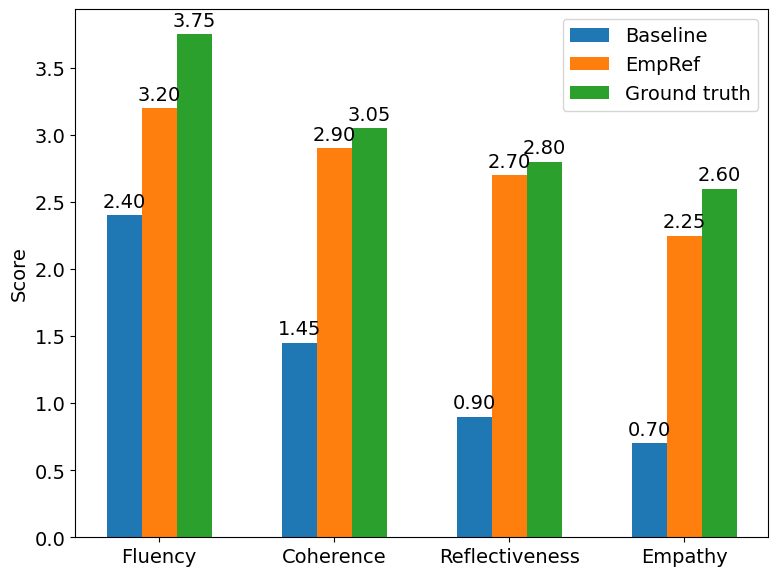

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Separate data for each model
base_df = humaneval[humaneval['Name'] == 'Base']
empref_df = humaneval[humaneval['Name'] == 'EmpRef']
taeget_df = humaneval[humaneval['Name'] == 'Target']

# Calculate means for each model and each metric
base_mean = base_df[['Fluency-total', 'Coherence-total', 'Reflectiveness-total', 'Empathy-total']].mean()
empref_mean = empref_df[['Fluency-total', 'Coherence-total', 'Reflectiveness-total', 'Empathy-total']].mean()
taeget_mean = taeget_df[['Fluency-total', 'Coherence-total', 'Reflectiveness-total', 'Empathy-total']].mean()

]
data = {
    'base_mean': base_mean,
    'empref_mean': empref_mean,
    'taeget_mean': taeget_mean,
}

plot_df = pd.DataFrame(data)

# Plotting
metrics = ['Fluency', 'Coherence', 'Reflectiveness', 'Empathy']
x = np.arange(len(metrics))  # label locations
width = 0.2  # width of the bars

# Adjusting the figure size
fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width, plot_df['base_mean'], width, label='Baseline')
rects2 = ax.bar(x, plot_df['empref_mean'], width, label='EmpRef')
rects3 = ax.bar(x + width, plot_df['taeget_mean'], width, label='Ground truth')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
# Position the legend inside the plot at the upper right
ax.legend(loc='upper right')

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


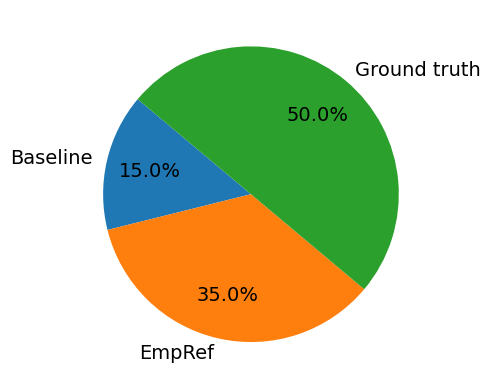

In [466]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14  # change the font size

percentage_rank1.plot.pie(autopct='%1.1f%%', pctdistance=0.7, startangle=140)
plt.ylabel('')  # Hide the y-axis label

plt.savefig("human_eval_best.pdf", format='pdf')  # Save the figure as a PDF
plt.show()

In [4]:
from sklearn.metrics import cohen_kappa_score

# Calculate kappa agreement
kappa = cohen_kappa_score(humaneval['Ranking-1'], humaneval['Ranking-2'])
print(f"The kappa agreement for the rankings is {kappa}")


The kappa agreement for the rankings is 0.6401892381919121


# Error Bars

In [18]:
import pandas as pd

data = pd.read_json('/home/tootiya/EmpRef-Final/codes/DATA/empref/empref.empref/2023-05-10214054.0.0001.16.0gpu/res_epoch-4.pkl_final_empref_test_k.0_p.0.9_b.1_t.0.7_rep.1.5_ngm.0/metric_nlgeval_list.json')

data.head()

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,EmbeddingAverageCosineSimilarity,VectorExtremaCosineSimilarity,GreedyMatchingScore
0,0.029412,9.440686e-10,3.031231e-12,1.731306e-13,0.084211,0.063674,3.380497e-10,0.781275,0.451769,0.596489
1,0.147059,2.111002e-09,5.183332e-12,2.588907e-13,0.064309,0.090103,2.338326e-04,0.937146,0.413881,0.706961
2,0.117647,1.888137e-09,4.811780e-12,2.448437e-13,0.123552,0.155877,2.328804e-05,0.885959,0.441834,0.681405
3,0.028571,9.166985e-10,2.942025e-12,1.679567e-13,0.065961,0.059863,3.558009e-10,0.895836,0.523329,0.697171
4,0.142857,2.049800e-09,5.030792e-12,2.511538e-13,0.157442,0.191975,8.737125e-05,0.937778,0.567863,0.794759


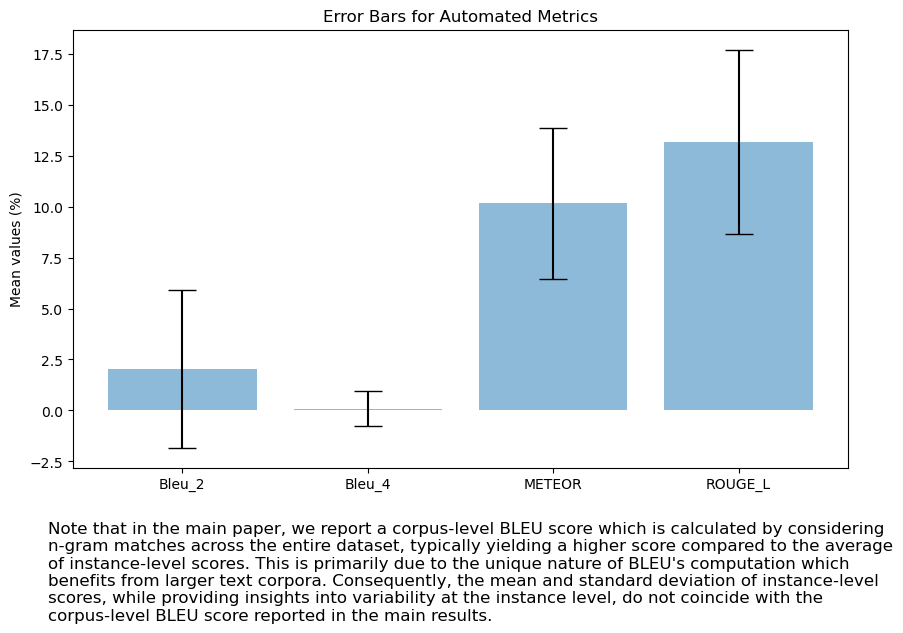

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

metrics = ['Bleu_2', 'Bleu_4', 'METEOR', 'ROUGE_L']

#(Normalized to %)
means = [data[metric].mean()*100 for metric in metrics]
stds = [data[metric].std()*100 for metric in metrics]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(metrics, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean values (%)')
ax.set_title('Error Bars for Automated Metrics')

caption = "Note that in the main paper, we report a corpus-level BLEU score which is calculated by considering n-gram matches across the entire dataset, typically yielding a higher score compared to the average of instance-level scores. This is primarily due to the unique nature of BLEU's computation which benefits from larger text corpora. Consequently, the mean and standard deviation of instance-level scores, while providing insights into variability at the instance level, do not coincide with the corpus-level BLEU score reported in the main results."
width = int(fig.get_size_inches()[0]*10)  
wrapped_caption = textwrap.fill(caption, width=width)

fig.text(0.1, -0.1, wrapped_caption, ha='left', fontsize=12, wrap=True)

plt.subplots_adjust(bottom=0.15)

plt.savefig('Error_Bars.pdf', bbox_inches='tight')

plt.show()


In [91]:
print(means)

[2.0285139864416992, 0.08941087398171722, 10.159962624067203, 13.17922642848811]


In [92]:
print(stds)

[3.8604259986350558, 0.8560616357579746, 3.7091402148778654, 4.540248065984209]
